In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

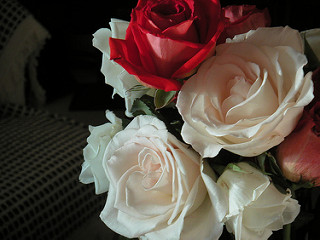

In [10]:
PIL.Image.open(str(roses[1]))

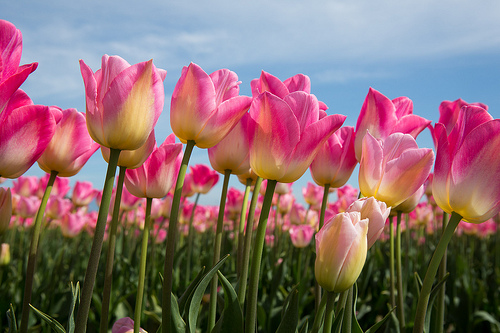

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.3097 - loss: 1.5801
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.5794 - loss: 1.0616
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.6703 - loss: 0.8410
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.7958 - loss: 0.5680
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.8551 - loss: 0.4025
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.9109 - loss: 0.2787
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.9684 - loss: 0.1281
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9821 - loss: 0.0707
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.9869 - loss: 0.0527
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9869 - loss: 0.0434
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.9908 - loss: 0.0340
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.3097 - loss: 1.5801
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.5794 - loss: 1.0616
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.6703 - loss: 0.8410
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.7958 - loss: 0.5680
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.8551 - loss: 0.4025
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.9109 - loss: 0.2787
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.9684 - loss: 0.1281
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9821 - loss: 0.0707
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.9869 - loss: 0.0527
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9869 - loss: 0.0434
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.9908 - loss: 0.0340
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6082 - loss: 2.7058


[2.677342414855957, 0.6132897734642029]

In [25]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


array([[  3.2256985 ,  18.33194   ,  -1.8639894 , -24.152637  ,
         -0.61794496],
       [  1.2327776 ,   2.7818756 , -12.540042  ,  -7.261685  ,
          4.819989  ],
       [ -9.322321  ,   0.41623345,  19.370108  , -16.873098  ,
         -2.3928003 ],
       ...,
       [ -7.130699  ,  -0.23406208, -11.968331  ,   1.5349398 ,
          3.0902143 ],
       [  7.8872137 ,  -2.6537118 , -13.719681  ,  -5.385194  ,
          0.6643945 ],
       [ -1.1345724 , -13.217938  ,  -1.9402568 ,   2.0911043 ,
          3.6531506 ]], dtype=float32)

In [27]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.7506965e-07, 9.9999976e-01, 1.6944141e-09, 3.5414613e-19,
       5.8907377e-09], dtype=float32)>

In [28]:
np.argmax(score)

1

In [29]:
y_test[0]

1

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

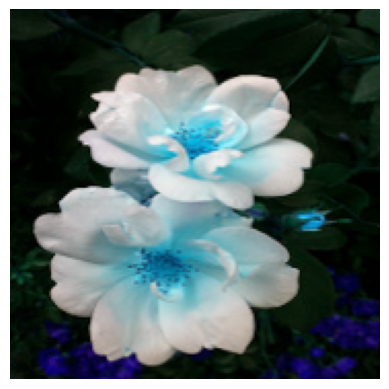

In [24]:
plt.axis('off')
plt.imshow(X[0])

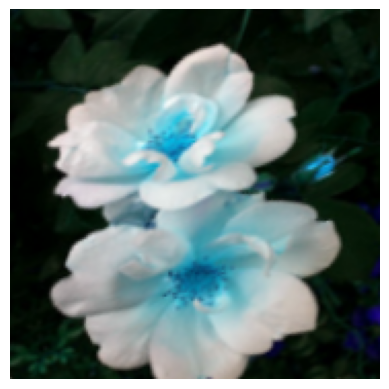

In [25]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [28]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.3126 - loss: 1.5857
Epoch 2/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.5468 - loss: 1.1132


In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5810 - loss: 1.0348


[1.0486388206481934, 0.5816993713378906]